<a href="https://colab.research.google.com/github/YousraAshour/machine_learning/blob/main/decision_trees/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# App dataset with decision trees

In [1]:
!pip install --upgrade scikit-learn==0.21 

     |████████████████████████████████| 6.7 MB 8.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.0 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.0 which is incompatible.


In [2]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 207 (delta 98), reused 164 (delta 55), pack-reused 0
Receiving objects: 100% (207/207), 34.32 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (98/98), done.
Checking out files: 100% (49/49), done.
/content/machine_learning_1/decision_trees


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import random
random.seed(0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.

In [4]:
app_dataset = pd.DataFrame({
    'Gender': ['Female','Female','Male','Female','Male','Male'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
app_dataset

,Gender,Age,App
0,Female,15,Snapchat
1,Female,25,SheIn
2,Male,32,Fantasy PL
3,Female,35,SheIn
4,Male,12,Snapchat
5,Male,14,Snapchat


# With age as a categorical feature

In [5]:
app_dataset_one_hot = pd.DataFrame(
    {'Gender_Female':[1,1,0,1,0,0],
     'Gender_Male':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Old':[0,1,1,1,0,0],
     'App_Snapchat':[1,0,0,0,1,1],
     'App_Fantasy_PL':[0,0,1,0,0,0],
     'App_SheIn':[0,1,0,1,0,0]})
app_dataset_one_hot

,Gender_Female,Gender_Male,Age_Young,Age_Old,App_Snapchat,App_Fantasy_PL,App_SheIn
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [7]:
X = app_dataset_one_hot[['Gender_Female','Gender_Male','Age_Old','Age_Young']]
y = app_dataset_one_hot[['App_Snapchat','App_Fantasy_PL','App_SheIn']]

In [16]:
from sklearn.tree import DecisionTreeClassifier
## TODO ##
# Train a Decision Tree Classifier and print score
dt = DecisionTreeClassifier().fit(X,y)
dt.score(X,y)



/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


1.0

In [ ]:
utils.display_tree(dt)

# With age as a numerical feature

In [17]:
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
print(app_dataset)

   Gender_Female  Gender_Male  Age         App
0              1            0   15    Snapchat
1              1            0   25       SheIn
2              0            1   32  Fantasy PL
3              1            0   35       SheIn
4              0            1   12    Snapchat
5              0            1   14    Snapchat


In [18]:
features = app_dataset[['Age','Gender_Female','Gender_Male']]
print(features)

   Age  Gender_Female  Gender_Male
0   15              1            0
1   25              1            0
2   32              0            1
3   35              1            0
4   12              0            1
5   14              0            1


In [19]:
labels = app_dataset['App']
print(labels)

0      Snapchat
1         SheIn
2    Fantasy PL
3         SheIn
4      Snapchat
5      Snapchat
Name: App, dtype: object


In [20]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


1.0

In [23]:
## TODO ##
# predict
# A girl aged 13
print(app_model.predict([[13,1,0]]))
# A woman aged 28
print(app_model.predict([[28,1,0]]))

# A man aged 34
print(app_model.predict([[34,0,1]]))


['Snapchat']
['SheIn']
['Fantasy PL']


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


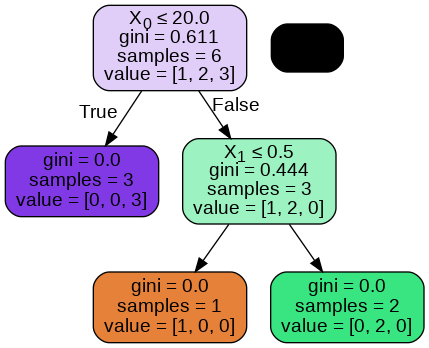

In [24]:
utils.display_tree(app_model)

# Decision trees for regression

In [25]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,6,0,1,0,4,3]

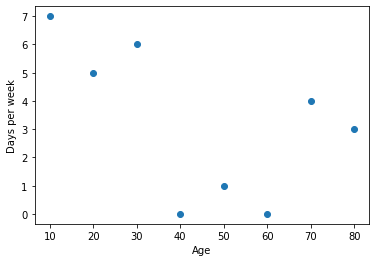

In [26]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [29]:
# use Decision Tree for Regreesion to fit tha data
# use depth = 2
dt_regressor = DecisionTreeRegressor(max_depth=2).fit(features, labels)

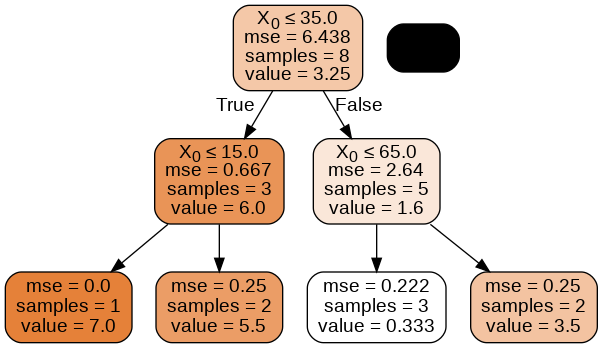

In [30]:
utils.display_tree(dt_regressor)

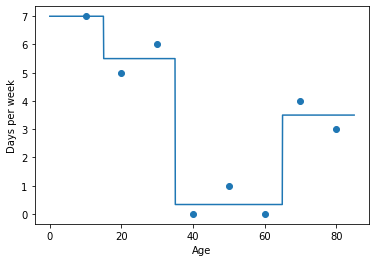

In [31]:
utils.plot_regressor(dt_regressor, features, labels)